In [1]:
#Import useful dependency for this model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
iris_df = pd.read_csv('Iris.csv')

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#it display first five rows of data
iris_df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#It drop(delete) Id column from data
iris_data=iris_df.drop(columns=['Id'])

In [7]:
iris_data.head()    

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_data.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#It give count of flower in each Species
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: >

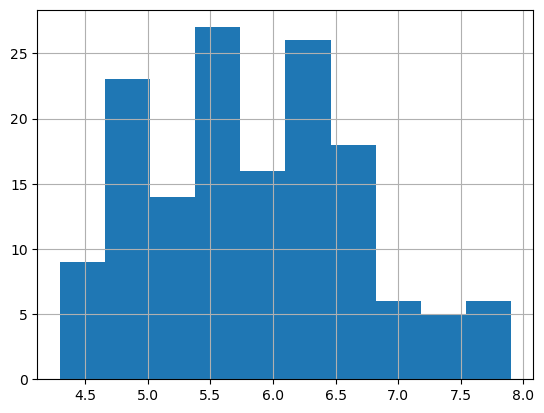

In [10]:
iris_data['SepalLengthCm'].hist()

<Axes: >

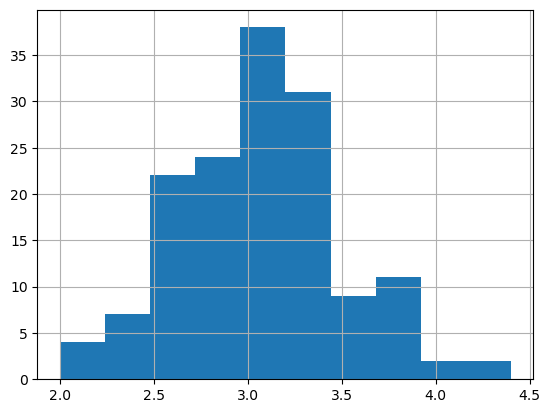

In [11]:
iris_data['SepalWidthCm'].hist()

<Axes: >

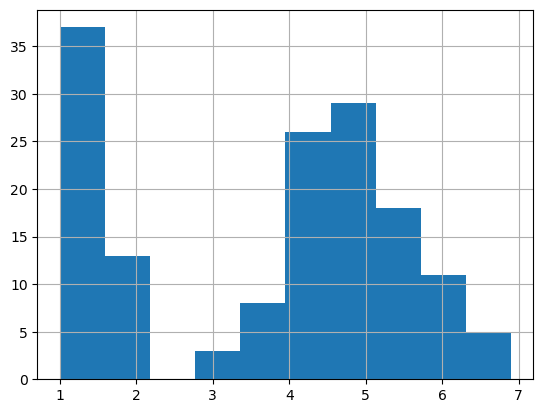

In [12]:
iris_data['PetalLengthCm'].hist()

<Axes: >

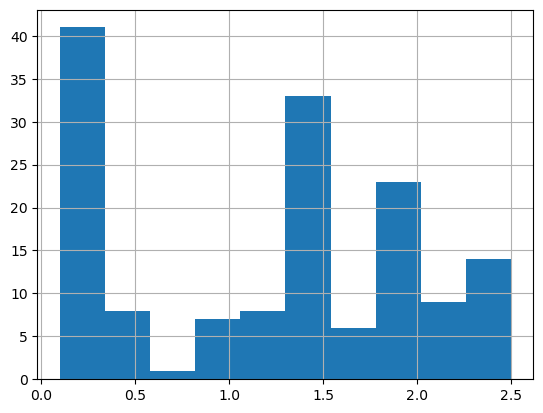

In [13]:
iris_data['PetalWidthCm'].hist()

In [14]:
from numpy.ma import size

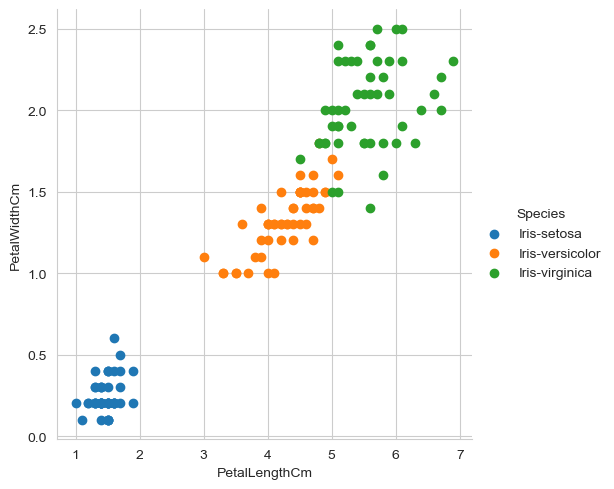

In [15]:
#Petal length vs petal width
sns.set_style("whitegrid");
sns.FacetGrid(iris_data,hue='Species', height =5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();
plt.show()

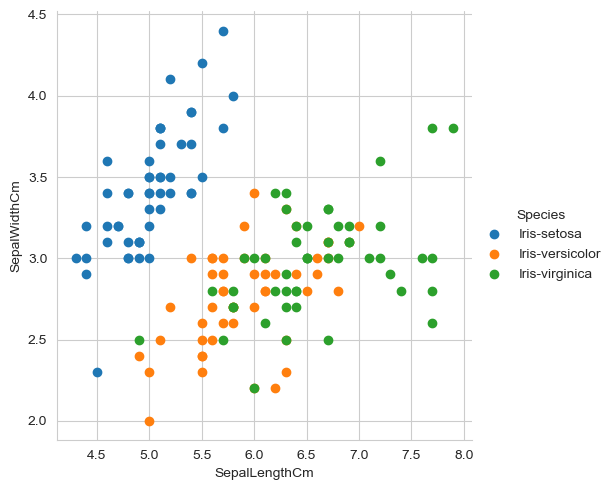

In [16]:
#Sepal length vs sepal width
sns.set_style("whitegrid");
sns.FacetGrid(iris_data,hue='Species', height =5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show()

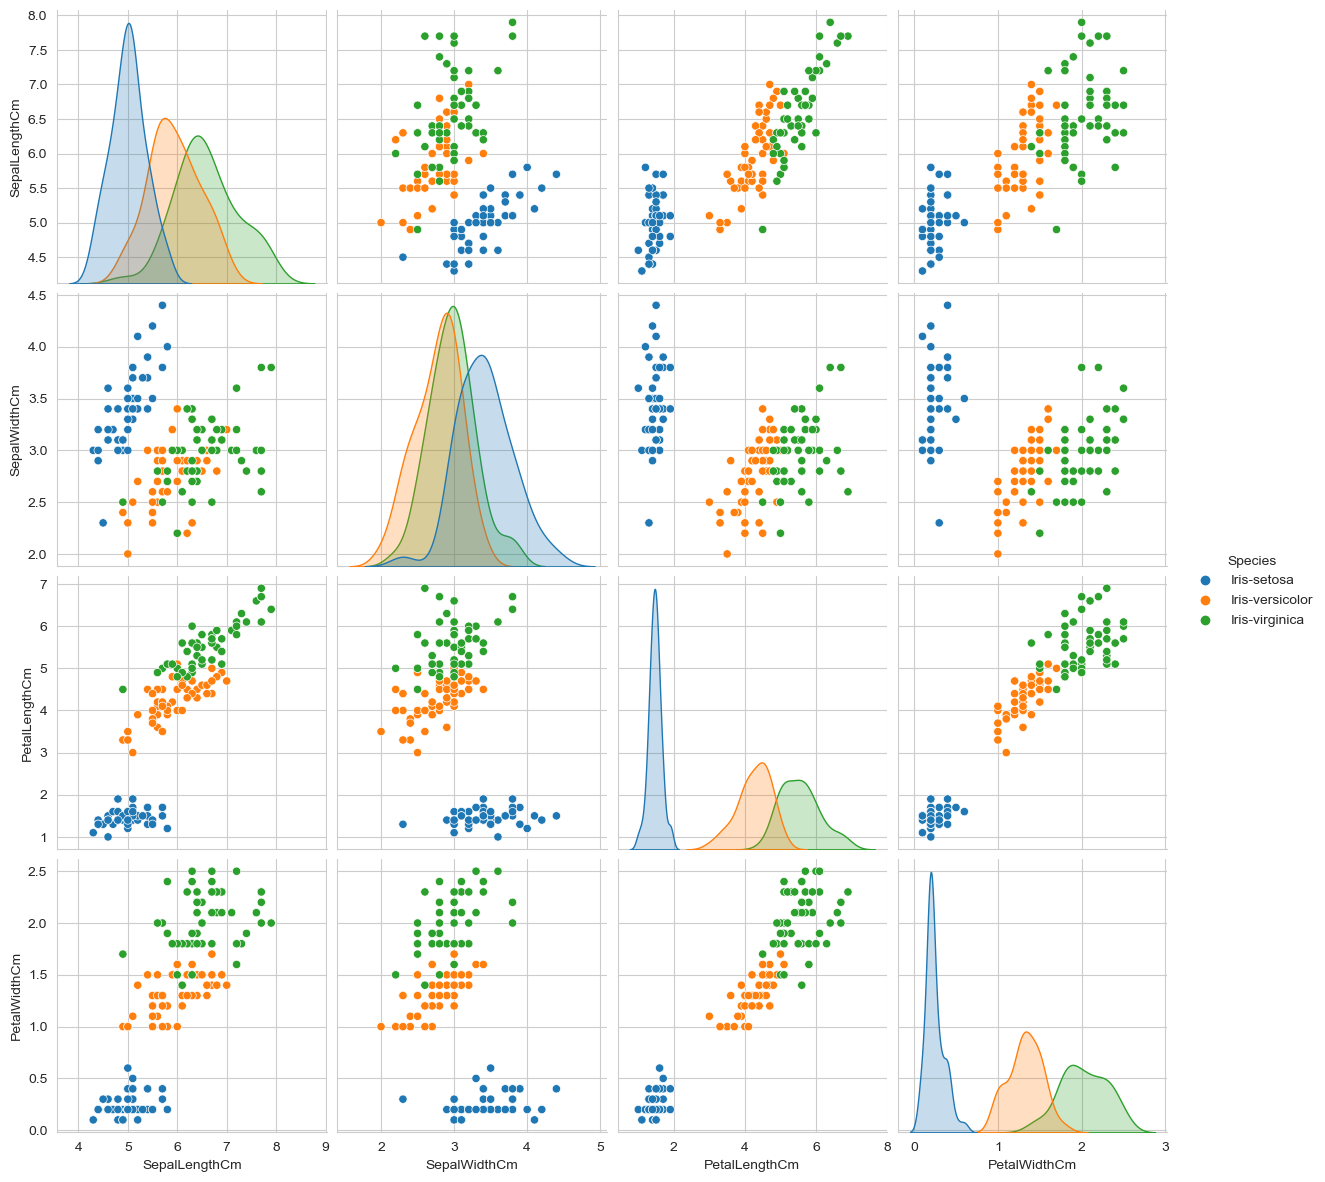

In [17]:
sns.pairplot(iris_data, hue='Species', height=3)
plt.show()

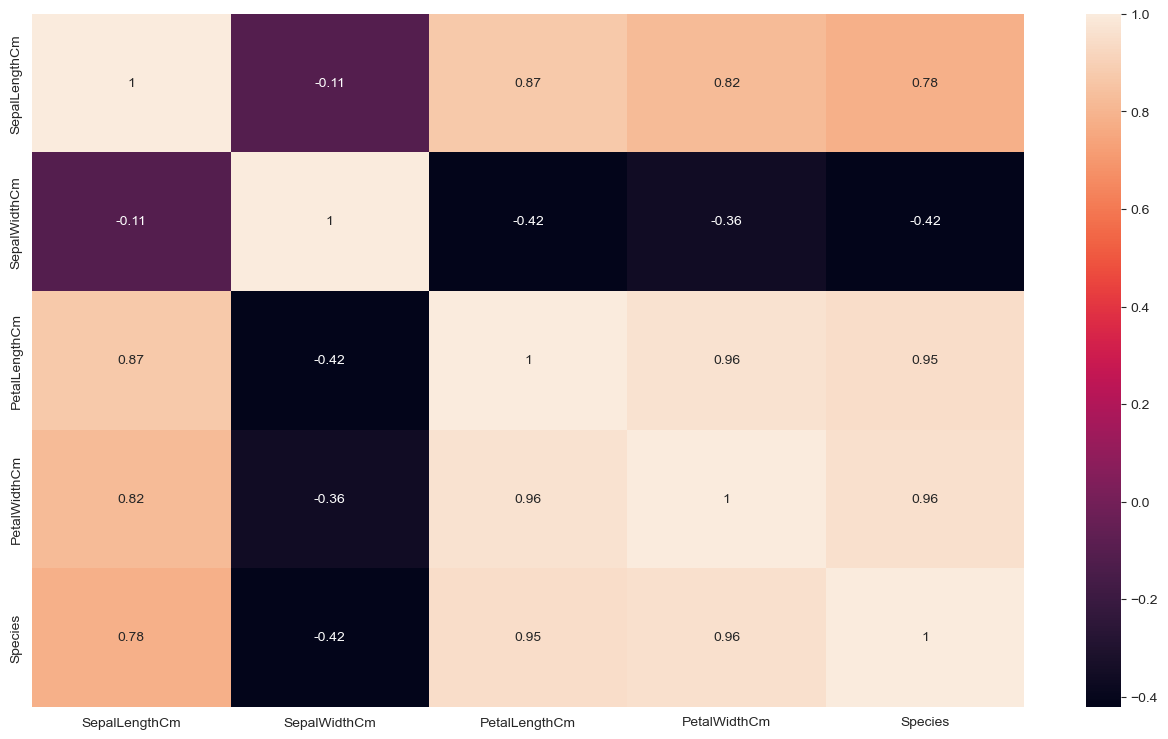

In [18]:
lab_enc=LabelEncoder()
iris_data['Species']=lab_enc.fit_transform(iris_data['Species'])
iris_fig=plt.figure(figsize=(16,9),dpi=100)
sns.heatmap(iris_data.corr(),annot =True)
plt.show()

In [19]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_nSpe = iris_data.drop(['Species'],axis = 1)
iris_Spe = iris_data['Species']
print(iris_nSpe)
print(iris_Spe)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [71]:
from sklearn.model_selection import train_test_split
iris_nSpe_train, iris_nSpe_test, iris_Spe_train, iris_Spe_test = train_test_split(iris_nSpe,iris_Spe, test_size=0.25)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
iris_model=KNeighborsClassifier()
iris_model.fit(iris_nSpe_train,iris_Spe_train)
iris_Spe_predict=iris_model.predict(iris_nSpe_test)
print('The accuracy of this mode',iris_model.score(iris_nSpe_test,iris_Spe_test)*100)

The accuracy of this mode 100.0


In [23]:
print(metrics.classification_report(iris_Spe_test,iris_Spe_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

    accuracy                           0.95        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.95      0.95      0.95        60

